In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5430370359310987973,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2911292622
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16351886141340230466
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
import cv2

import os
from glob import glob

import tensorflow as tf
from PIL import Image

import numpy as np
from matplotlib import pyplot as plt
cv2.__version__

'4.5.3'

In [5]:
os.getcwd()

'C:\\Users\\hyunj\\OneDrive\\바탕 화면\\Codings\\0.실습\\콘크리트이미지'

In [7]:
os.listdir('../../../scope/210909/X6400/40B')

['0001.png',
 '0002.png',
 '0003.png',
 '0004.png',
 '0005.png',
 '0006.png',
 '0007.png',
 '0008.png',
 '0009.png',
 '0010.png',
 '0011.png',
 '0012.png',
 '0013.png',
 '0014.png',
 '0015.png',
 '0016.png',
 '0017.png',
 '0018.png',
 '0019.png',
 '0020.png',
 '0021.png',
 '0022.png',
 '0023.png',
 '0024.png',
 '0025.png',
 '0026.png',
 '0027.png',
 '0028.png',
 '0029.png',
 '0030.png',
 '0031.png',
 '0032.png',
 '0033.png',
 '0034.png',
 '0035.png',
 '0036.png',
 '0037.png',
 '0038.png',
 '0039.png',
 '0040.png',
 '0041.png',
 '0042.png',
 '0043.png',
 '0044.png',
 '0045.png',
 '0046.png',
 '0047.png',
 '0048.png',
 '0049.png',
 '0050.png',
 '0051.png',
 '0052.png',
 '0053.png',
 '0054.png',
 '0055.png',
 '0056.png',
 '0057.png',
 '0058.png',
 '0059.png',
 '0060.png',
 '0061.png',
 '0062.png',
 '0063.png',
 '0064.png',
 '0065.png',
 '0066.png',
 '0067.png',
 '0068.png',
 '0069.png',
 '0070.png',
 '0071.png',
 '0072.png',
 '0073.png',
 '0074.png',
 '0075.png',
 '0076.png',
 '0077.png',

In [8]:
data_paths = glob('../../../scope/210909/X6400/40B/*.png')
data_paths

['../../../scope/210909/X6400/40B\\0001.png',
 '../../../scope/210909/X6400/40B\\0002.png',
 '../../../scope/210909/X6400/40B\\0003.png',
 '../../../scope/210909/X6400/40B\\0004.png',
 '../../../scope/210909/X6400/40B\\0005.png',
 '../../../scope/210909/X6400/40B\\0006.png',
 '../../../scope/210909/X6400/40B\\0007.png',
 '../../../scope/210909/X6400/40B\\0008.png',
 '../../../scope/210909/X6400/40B\\0009.png',
 '../../../scope/210909/X6400/40B\\0010.png',
 '../../../scope/210909/X6400/40B\\0011.png',
 '../../../scope/210909/X6400/40B\\0012.png',
 '../../../scope/210909/X6400/40B\\0013.png',
 '../../../scope/210909/X6400/40B\\0014.png',
 '../../../scope/210909/X6400/40B\\0015.png',
 '../../../scope/210909/X6400/40B\\0016.png',
 '../../../scope/210909/X6400/40B\\0017.png',
 '../../../scope/210909/X6400/40B\\0018.png',
 '../../../scope/210909/X6400/40B\\0019.png',
 '../../../scope/210909/X6400/40B\\0020.png',
 '../../../scope/210909/X6400/40B\\0021.png',
 '../../../scope/210909/X6400/40B\

In [9]:
path = data_paths[0]
path
# test = "C:\\Users\\hyunj\\OneDrive\\바탕 화면\\현미경\\210610\\20210610124006549.jpg"

'../../../scope/210909/X6400/40B\\0001.png'

In [10]:
len(data_paths)

200

# image

In [11]:
path

'../../../scope/210909/X6400/40B\\0001.png'

In [12]:
# 파일 열기
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [13]:
# channel이 포함됨
image.shape

TensorShape([3000, 4000, 3])

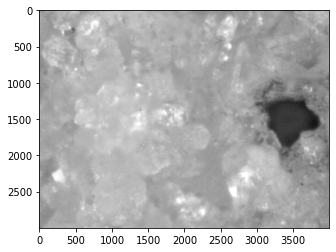

In [14]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

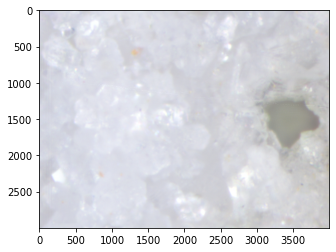

In [15]:
plt.imshow(image[:, :, :])
plt.show()

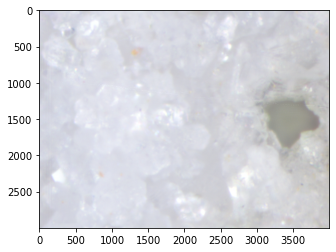

In [16]:
plt.imshow(image[:, :, :], 'gray')
plt.show()

In [17]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [18]:
image.shape

(3000, 4000, 3)

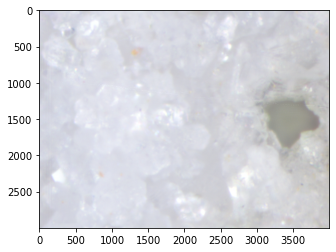

In [19]:
plt.imshow(image, 'gray')
plt.show()

# image data size

In [20]:
from tqdm import tqdm_notebook

In [21]:
data_paths[:8]

['../../../scope/210909/X6400/40B\\0001.png',
 '../../../scope/210909/X6400/40B\\0002.png',
 '../../../scope/210909/X6400/40B\\0003.png',
 '../../../scope/210909/X6400/40B\\0004.png',
 '../../../scope/210909/X6400/40B\\0005.png',
 '../../../scope/210909/X6400/40B\\0006.png',
 '../../../scope/210909/X6400/40B\\0007.png',
 '../../../scope/210909/X6400/40B\\0008.png']

In [22]:
heights = []
widths = []

for path in tqdm_notebook(data_paths):
    image_pil = Image.open(path)
    image = np.array(image_pil)
    h, w, _ = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-22-8a29a8997f21>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(data_paths):


  0%|          | 0/200 [00:00<?, ?it/s]

In [23]:
np.unique(heights)

array([3000])

In [24]:
np.unique(widths)

array([4000])

In [25]:
data_paths[0]

'../../../scope/210909/X6400/40B\\0001.png'

In [ ]:
color_img = cv2.imread(data_paths[0], cv2.IMREAD_COLOR)
cv2.imshow("color_img", color_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
print(color_img)

In [ ]:
import sys


src = cv2.imread(data_paths[0], cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
# 그레이스케일 [0], BG [0,1], BGR [0,1,2]
hist = cv2.calcHist([src], [0], None, [256], [0,256]) # 꼭 리스트 형태로 입력


plt.plot(hist)
plt.show()

In [ ]:
import sys


img = cv2.imread(data_paths[0])
color = ('b','g','r')

if src is None:
    print('Image load failed!')
    sys.exit()
    
# 그레이스케일 [0], BG [0,1], BGR [0,1,2]
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) # 꼭 리스트 형태로 입력
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()

In [ ]:
def Threshold(img, T):
    return np.uint8(img>T)*255

bi_src = Threshold(src,170)
bi_img = Threshold(img,170)
image_pil = Image.open(data_paths[0])
image = np.array(image_pil)

fig = plt.figure(figsize=(25, 15))
plt.subplot(311)
plt.imshow(bi_src,cmap='gray')

plt.subplot(312)
plt.imshow(bi_img,cmap='gray')

plt.subplot(313)
plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
hist =np.zeros(256)
img_flat = np.reshape(img, -1)
for i in range(len(img_flat)):
    hist[img_flat[i]]+=1
hist


In [ ]:
hist = hist/len(img_flat)

fig = plt.figure()
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.bar(np.arange(256),hist)
plt.xlim([0,256])
fig.tight_layout()
plt.show()

In [ ]:
mu = 0

for i in range(256):
    mu+= i*hist[i]
    
w =np.zeros(256)
mu0 =np.zeros(256)
mu1 =np.zeros(256)
T_bet =0
w[0] = hist[0]
threshold=0

In [ ]:
for i in range(1,256):
    w[i] = w[i-1]+hist[i]
    mu0[i] = (w[i-1]*mu0[i-1]+i*hist[i])/(w[i]+1e-10)
    mu1[i] = (mu - w[i]*mu0[i])/(1-w[i]+1e-10)
    n_t = w[i]*(1-w[i])*((mu0[i]-mu1[i])**2)

    if n_t>T_bet:
        T_bet = n_t
        threshold = i

In [ ]:
len(img_flat)

In [ ]:
def Threshold(img, T):
    return np.uint8(img>T)*255

otsu_img = Threshold(img,threshold)

plt.imshow(otsu_img,cmap='gray')
plt.show()

In [ ]:
ret, thr = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
ret2, thr2 = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)
# 픽셀값이 임계값 보다 크면 임계값, 작으면 픽셀값 그대로
ret3, thr3 = cv2.threshold(img,120,255,cv2.THRESH_TRUNC)
# 픽셀값이 임계값 보다 크면 픽셀 값 그대로, 작으면 0
ret4, thr4 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO)
# 픽셀값이 임계값 보다 크면 0, 작으면 픽셀값 그대로
ret5, thr5 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO_INV)
ret6, thr6 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig = plt.figure()
plt.subplot(231)
plt.imshow(thr,cmap='gray')
plt.subplot(232)
plt.imshow(thr2,cmap='gray')
plt.subplot(233)
plt.imshow(thr3,cmap='gray')
plt.subplot(234)
plt.imshow(thr4,cmap='gray')
plt.subplot(235)
plt.imshow(thr5,cmap='gray')
plt.subplot(236)
plt.imshow(thr6,cmap='gray')
fig.tight_layout()
plt.show()

### cv2.Sobel(src, ddepth, dx, dy, dst=None, ksize=None, scale=None, delta=None, borderType=None) -> dst

- src: 입력 영상
- ddepth: 출력 영상 데이터 타입. -1이면 입력 영상과 같은 데이터 타입을 사용.
- dx: x 방향 미분 차수. 1차미분할지 2차미분 할지 결정
- dy: y 방향 미분 차수.
- dst: 출력 영상(행렬)
- ksize: 커널 크기. 기본값은 3.
- scale 연산 결과에 추가적으로 곱할 값. 기본값은 1.
- delta: 연산 결과에 추가적으로 더할 값. 기본값은 0.
- borderType: 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_DEFAULT.


In [ ]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)
laplacian = cv2.Laplacian(img, cv2.CV_16U)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
img_sobel = cv2.addWeighted(sobelx, 1, sobely, 1, 0)

plt.figure(figsize=(15,12))
plt.imshow(img_sobel, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
len(img_sobel)

In [ ]:
img_sobel

In [ ]:
cv2.CV_8U

In [ ]:
edges = cv2.Canny(image, 20, 120)

plt.figure(figsize=(15,12))
plt.subplot(211)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(212)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# 기본미분

G_x = np.array([[-1,1]])
G_y = np.array([[-1],[1]])

edge_x = cv2.filter2D(image, -1, G_x)
edge_y = cv2.filter2D(image, -1, G_y)

plt.figure(figsize=(25,20))
plt.subplot(311)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(312)
plt.imshow(edge_x,cmap = 'gray')
plt.title('Edge_x Image')
plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.imshow(edge_y,cmap = 'gray')
plt.title('Edge_y Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# 로버츠 교차필터 (대각선방향경계검출효과는 높지만, 에지 강도는 약함)

G_x = np.array([[1,0],[0,-1]])
G_y = np.array([[0,1],[-1,0]])

edge_x = cv2.filter2D(image, -1, G_x)
edge_y = cv2.filter2D(image, -1, G_y)

plt.figure(figsize=(25,20))
plt.subplot(311)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(312)
plt.imshow(edge_x,cmap = 'gray')
plt.title('Edge_x Image')
plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.imshow(edge_y,cmap = 'gray')
plt.title('Edge_y Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# 프리윗필터 (에지강도는 높지만, 사선에 대한 검출은 약함)

G_x = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
G_y = np.array([[-1,-1,-1],[0,0,0], [1,1,1]])

edge_x = cv2.filter2D(image, -1, G_x)
edge_y = cv2.filter2D(image, -1, G_y)

plt.figure(figsize=(25,20))
plt.subplot(311)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(312)
plt.imshow(edge_x,cmap = 'gray')
plt.title('Edge_x Image')
plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.imshow(edge_y,cmap = 'gray')
plt.title('Edge_y Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# sobel필터

G_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
G_y = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])

edge_x = cv2.filter2D(image, -1, G_x)
edge_y = cv2.filter2D(image, -1, G_y)

# kernel 생성
sobel_x = cv2.Sobel(image, -1,1,0, ksize=3)
sobel_y = cv2.Sobel(image, -1,0,1, ksize=3)

plt.figure(figsize=(25,20))
plt.subplot(311)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(312)
plt.imshow(edge_x,cmap = 'gray')
plt.title('Edge_x Image')
plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.imshow(edge_y,cmap = 'gray')
plt.title('Edge_y Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# scharr필터

G_x = np.array([[-3,0,3], [-10,0,10], [-3,0,3]])
G_y = np.array([[-3,-10,-3],[0,0,0], [3,10,3]])

edge_x = cv2.filter2D(image, -1, G_x)
edge_y = cv2.filter2D(image, -1, G_y)

# kernel 생성
scharr_x = cv2.Scharr(image, -1,1,0)
scharr_y = cv2.Scharr(image, -1,0,1)

plt.figure(figsize=(25,20))
plt.subplot(311)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(312)
plt.imshow(edge_x,cmap = 'gray')
plt.title('Edge_x Image')
plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.imshow(edge_y,cmap = 'gray')
plt.title('Edge_y Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# 라플라시안 필터

edge = cv2.Laplacian(image, -1)

plt.figure(figsize=(25,20))
plt.subplot(211)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(212)
plt.imshow(edge,cmap = 'gray')
plt.title('Laplacian Image')
plt.xticks([]), plt.yticks([])

plt.show()

# Level-set

In [ ]:
import numpy as np
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io


def grad(x):
    return np.array(np.gradient(x))


def norm(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))


def stopping_fun(x):
    return 1. / (1. + norm(grad(x))**2)



img = color.rgb2gray(image)
img = img - np.mean(img)

# Smooth the image to reduce noise and separation between noise and edge becomes clear
img_smooth = scipy.ndimage.filters.gaussian_filter(img, sigma=1)

F = stopping_fun(img_smooth)

plt.figure(figsize=(25,20))
plt.subplot(211)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(212)
plt.imshow(img_smooth,cmap = 'gray')
plt.title('Level-set Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
def default_phi(x):
    # Initialize surface phi at the border (5px from the border) of the image
    # i.e. 1 outside the curve, and -1 inside the curve
    phi = np.ones(x.shape[:2])
    phi[5:-5, 5:-5] = -1.
    return phi


dt = 1.
n_iter = 10

for i in range(n_iter):
    dphi = grad(phi)
    dphi_norm = norm(dphi)

    dphi_t = F * dphi_norm

    phi = phi + dt * dphi_t

In [ ]:
def curvature(f):
    fy, fx = grad(f)
    norm = np.sqrt(fx**2 + fy**2)
    Nx = fx / (norm + 1e-8)
    Ny = fy / (norm + 1e-8)
    return div(Nx, Ny)


def div(fx, fy):
    fyy, fyx = grad(fy)
    fxy, fxx = grad(fx)
    return fxx + fyy


def dot(x, y, axis=0):
    return np.sum(x * y, axis=axis)


v = 1.
dt = 1.

g = stopping_fun(img_smooth, alpha)
dg = grad(g)

for i in range(n_iter):
    dphi = grad(phi)
    dphi_norm = norm(dphi)
    kappa = curvature(phi)

    smoothing = g * kappa * dphi_norm
    balloon = g * dphi_norm * v
    attachment = dot(dphi, dg)

    dphi_t = smoothing + balloon + attachment

    phi = phi + dt * dphi_t